# Tipe Data, Handling missing vlues, outliers dan Data Scaling
materi: 18/01/2023

# Soal 1. Menentukan jenis data categorical atau numeric
Jelaskan data kategorikal (kualitatif) dan data numerik (kuantitatif)



Jawab disini:
1. data kategorikal(kualitatif/KATA)<br>
Data kategorikal merupakan data yang mencerminkan karakteristik seperti bahasa, jenis kelamin seseorang, warna rambut seseorang, atau nilai numerik bulat yang tidak memiliki makna matematis seperti 1 untuk laki-laki dan 0 untuk perempuan. 
2. data numerik(kuantitiatif/AGKA)<br>
terbagi menjadi 2, yaitu: continue dan diskrit
- Variabel diskrit merupakan data yang memiliki nilai yang terbatas, seperti contoh : jumlah medali yang dimenangkan oleh para atlet.
- Data continous merupakan jenis data yang berbeda dengan data kategorikal. Data kontinu merupakan data kuantitatif yang dapat diukur, dapat memiliki nilai yang sangat tinggi (infinite). Salah satu contoh data-data kontinu adalah sebagai berikut:
    1. Massa bayi yang baru dilahirkan
    2. Kecepatan angin yang berhembus
    3. Temperatur dari pendingin makanan
    4. Usia



---



---



---



Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=19Yc404D3U3OPPoUP8J1pXETlTmA4hOOX)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('austin_weather.csv', na_values=['na', '-'])
df.head()

Date  TempHighF  TempAvgF  TempLowF  DewPointHighF  DewPointAvgF  \
0  12/21/2013         74      60.0        45           67.0          49.0   
1  12/22/2013         56      48.0        39           43.0          36.0   
2  12/23/2013         58      45.0        32           31.0          27.0   
3  12/24/2013         61      46.0        31           36.0          28.0   
4  12/25/2013         58      50.0        41           44.0          40.0   

   DewPointLowF  HumidityHighPercent  HumidityAvgPercent  HumidityLowPercent  \
0          43.0                 93.0                75.0                57.0   
1          28.0                 93.0                68.0                43.0   
2          23.0                 76.0                52.0                27.0   
3          21.0                 89.0                56.0                22.0   
4          36.0                 86.0                71.0                56.0   

   ...  SeaLevelPressureAvgInches  SeaLevelPressureLowInches  \
0  ...                      29.68                      29.59   
1  ...                      30.13                      29.87   
2  ...                      30.49                      30.41   
3  ...                      30.45                      30.30   
4  ...                      30.33                      30.27   

   VisibilityHighMiles  VisibilityAvgMiles  VisibilityLowMiles  WindHighMPH  \
0                 10.0                 7.0                 2.0         20.0   
1                 10.0                10.0                 5.0         16.0   
2                 10.0                10.0                10.0          8.0   
3                 10.0                10.0                 7.0         12.0   
4                 10.0                10.0                 7.0         10.0   

   WindAvgMPH  WindGustMPH  PrecipitationSumInches               Events  
0         4.0         31.0                    0.46  Rain , Thunderstorm  
1         6.0         25.0                       0                       
2         3.0         12.0                       0                       
3         4.0         20.0                       0                       
4         2.0         16.0                       T                       

[5 rows x 21 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1319 non-null   object 
 1   TempHighF                   1319 non-null   int64  
 2   TempAvgF                    1312 non-null   float64
 3   TempLowF                    1319 non-null   int64  
 4   DewPointHighF               1312 non-null   float64
 5   DewPointAvgF                1308 non-null   float64
 6   DewPointLowF                1312 non-null   float64
 7   HumidityHighPercent         1317 non-null   float64
 8   HumidityAvgPercent          1309 non-null   float64
 9   HumidityLowPercent          1317 non-null   float64
 10  SeaLevelPressureHighInches  1316 non-null   float64
 11  SeaLevelPressureAvgInches   1316 non-null   float64
 12  SeaLevelPressureLowInches   1316 non-null   float64
 13  VisibilityHighMiles         1307 

In [3]:
df = df.sample(n=1000, random_state=1)
#ditambah random_state agar viz scatter tidak berubah saat reset kernel

<h2>Soal 2. Visualisasi Scatter Plot dengan memiliki missing value </h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' dan 'na' yang dianggap sebagai missing value,  namun data ini tidak bisa di ubah ke bentuk float, maka ubahlah data tersebut menjadi NaN dengan menambahkan argumen na_values=['na', '-'] saat menggunakan atribut pd.read_csv('nama file.csv'. na_values=..]
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

a. Buahlah visualisasi scatter plot menggunakan sample(1000), sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


b. Kemudian bandingkan data visualisasi diatas dengan visualisasi data (sample=1000) setelah handling missing value menggunakan:
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

#### Ubah tipe  DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG)  data menjadi float

In [4]:
#cara i
#cols = ['DewPointAvgF', 'HumidityAvgPercent','WindAvgMPH']
#df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df.info()

In [5]:
df = df.astype({'DewPointAvgF': 'float64', 'HumidityAvgPercent': 'float64', 'WindAvgMPH':'float64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 288 to 549
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1000 non-null   object 
 1   TempHighF                   1000 non-null   int64  
 2   TempAvgF                    994 non-null    float64
 3   TempLowF                    1000 non-null   int64  
 4   DewPointHighF               995 non-null    float64
 5   DewPointAvgF                992 non-null    float64
 6   DewPointLowF                995 non-null    float64
 7   HumidityHighPercent         999 non-null    float64
 8   HumidityAvgPercent          994 non-null    float64
 9   HumidityLowPercent          999 non-null    float64
 10  SeaLevelPressureHighInches  997 non-null    float64
 11  SeaLevelPressureAvgInches   997 non-null    float64
 12  SeaLevelPressureLowInches   997 non-null    float64
 13  VisibilityHighMiles         990 

#### Buahlah visualisasi scatter plot menggunakan sample(1000), sehingga menghasilkan gambar seperti dibawah:

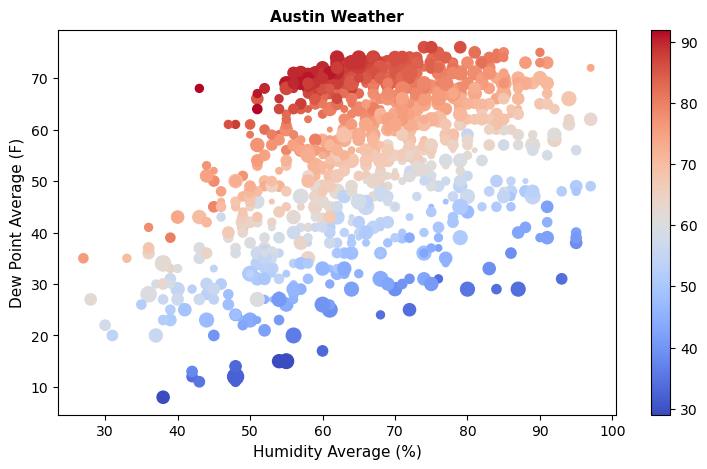

In [6]:
#code here
#Tanpa Handling missing value
fig, ax = plt.subplots(figsize=(9,5))
s=df['WindAvgMPH']
points = plt.scatter(df['HumidityAvgPercent'],df['DewPointAvgF'], c=df["TempAvgF"], s=11*s, cmap="coolwarm", alpha=1)
plt.colorbar(points)

#set title, x axes dan y axes label
ax.set_title('Austin Weather', fontsize = 11, fontweight="bold")
ax.set_xlabel('Humidity Average (%)', fontsize = 11)
ax.set_ylabel('Dew Point Average (F)', fontsize = 11)
plt.show()

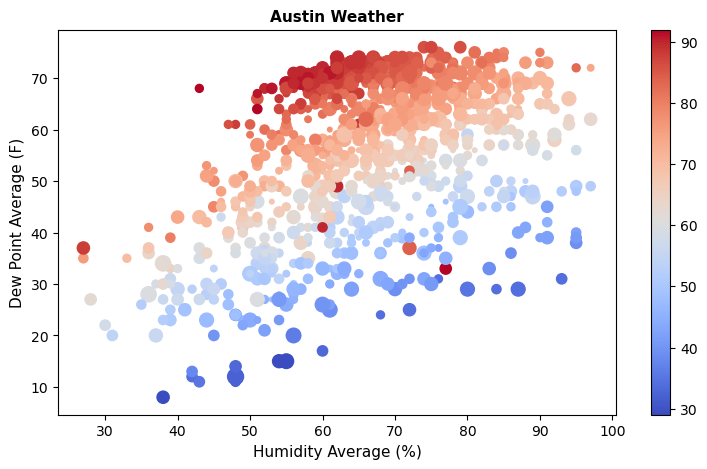

In [7]:
# code here
#Dengan Handling missing value
#df['TempAvgF'].fillna(df['TempAvgF'].mean())

#sesuai soal dengan method=ffill
df = df.fillna(method="ffill")
#Dengan Handling missing value
fig, ax = plt.subplots(figsize=(9,5))
s=df['WindAvgMPH']
points = plt.scatter(df['HumidityAvgPercent'],df['DewPointAvgF'], c=df["TempAvgF"], s=11*s, cmap="coolwarm", alpha=1)
plt.colorbar(points)

#set title, x axes dan y axes label
ax.set_title('Austin Weather', fontsize = 11, fontweight="bold")
ax.set_xlabel('Humidity Average (%)', fontsize = 11)
ax.set_ylabel('Dew Point Average (F)', fontsize = 11)
plt.show()

- Humidity Average = rerata kelembaban
- Dew Point avg= rerata titik embun
- TempAvgF = suhu udara(F), (warna)
- WindAvgMPH = kecepatan hembusan angin(MPH), (size)
<br>
Analisa : <br>
1. semakin kecil kelembaban diiringi dengan rendahnya rerata titik embun, berarti menandakan suhu udara di Austin(dalam F derajat) yang semakin rendah/semakin dingin dan memungkinkan hanya ada kecepatan hembusan angin cenderung sedikit namun berhembus kencang(MPH)
2. dengan ukuran kelembaban dan titik embun yg medium, suhu Austin tidak terlalu panas/dingin(standar), namun banyak hembusan angin tapi tidak terlalu kencang   
3. semakin besar kelembaban diiringi dengan tingginya titik embun, menyebabkan suhu di Austin semakin panas dan kecepatan angin yang signifikan berhembus kencang 

#                     **Expected output**

#                     **Tanpa Handling missing value**

![tanpa handling missing value](https://drive.google.com/uc?id=1FYJkCwAfm8f3jyNdzOnCvp15hS_DixHr)

##                    **Dengan Handling missing value**
![dengan handling missing value](https://drive.google.com/uc?id=1nqZuPdBsqSsOud-_XuBGujDAcJWEEvIr)

Download [price.csv](https://drive.google.com/uc?export=download&id=1LfuQmLb8AZxAvJzgWJ3u4h49EoTGqO-R)

In [8]:
df2 = pd.read_csv('price.csv')
df2.head()

Observation  Dist_Taxi  Dist_Market  Dist_Hospital  Carpet  Builtup  \
0            1     9796.0       5250.0        10703.0  1659.0   1961.0   
1            2     8294.0       8186.0        12694.0  1461.0   1752.0   
2            3    11001.0      14399.0        16991.0  1340.0   1609.0   
3            4     8301.0      11188.0        12289.0  1451.0   1748.0   
4            5    10510.0      12629.0        13921.0  1770.0   2111.0   

        Parking City_Category  Rainfall  House_Price  
0          Open         CAT B       530      6649000  
1  Not Provided         CAT B       210      3982000  
2  Not Provided         CAT A       720      5401000  
3       Covered         CAT B       620      5373000  
4  Not Provided         CAT B       450      4662000

---

<h2>Soal 3. Visualisasi Data with Handling outliers </h2>

Pada tugas kali ini, kita akan melakukan handling outliers. Outliers ditemukan pada kolom 'House_Price' dengan menggunakan boxplot dari library seaborn seperti gambar berikut: 


![boxplot1](https://drive.google.com/uc?id=1y2jRwf8zRPXQtSBkmjJLcqUm4l6DR7d9)


Dengan menggunakan Interquartile range, kita bisa temukan nilai data outliers dan meremove data outlier tersebut. 

*   Tentukan nilai batas atas dan batas bawah dari Interquartile range tersebut
*   Remove data outliers tersebut menggunakan batas atas dan batas bawah
*   Visualisasikan hasil data yang sudah d remove outliers seperti expected berikut:







#### Tentukan nilai batas atas dan batas bawah dari Interquartile range tersebut

In [9]:
#buat fungsi
def get_lower_upper_bound(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return lower_bound, upper_bound

In [10]:
#buat fungsi untuk menemukan nilai outlier
def get_outliers_iqr(x):
    lower_bound, upper_bound = get_lower_upper_bound(x)
    #gunakan np.where untuk filtering dengan kondisi atau
    return x[np.where((x > upper_bound) | (x < lower_bound))]

In [11]:
#menemukan outlier 'House_Price'
get_outliers_iqr(df2['House_Price'].values)

array([150000000,  11632000,     30000], dtype=int64)

#### Remove data outliers tersebut menggunakan batas atas dan batas bawah

In [12]:
q1 = df2['House_Price'].quantile(0.25)
q3 = df2['House_Price'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
print(lower_bound, upper_bound)

871625.0 10976625.0


In [13]:
df2 = df2.loc[(df2['House_Price']>lower_bound) & (df2['House_Price']<upper_bound)]
df2

Observation  Dist_Taxi  Dist_Market  Dist_Hospital  Carpet  Builtup  \
0              1     9796.0       5250.0        10703.0  1659.0   1961.0   
1              2     8294.0       8186.0        12694.0  1461.0   1752.0   
2              3    11001.0      14399.0        16991.0  1340.0   1609.0   
3              4     8301.0      11188.0        12289.0  1451.0   1748.0   
4              5    10510.0      12629.0        13921.0  1770.0   2111.0   
..           ...        ...          ...            ...     ...      ...   
931          932     9297.0      12537.0        14418.0  1174.0   1429.0   
932          933    10915.0      17486.0        15964.0  1549.0   1851.0   
933          934     9205.0      10418.0        14496.0  1118.0   1337.0   
934          935    10915.0      17486.0        15964.0  1549.0   1851.0   
935          936    10915.0      17486.0        15964.0  1549.0   1851.0   

          Parking City_Category  Rainfall  House_Price  
0            Open         CAT B       530      6649000  
1    Not Provided         CAT B       210      3982000  
2    Not Provided         CAT A       720      5401000  
3         Covered         CAT B       620      5373000  
4    Not Provided         CAT B       450      4662000  
..            ...           ...       ...          ...  
931       Covered         CAT C      1110      5434000  
932  Not Provided         CAT C      1220      7062000  
933          Open         CAT A       560      7227000  
934  Not Provided         CAT C      1220      7062000  
935  Not Provided         CAT C      1220      7062000  

[933 rows x 10 columns]

#### Visualisasikan hasil data yang sudah d remove outliers seperti expected berikut:

<AxesSubplot:xlabel='House_Price'>

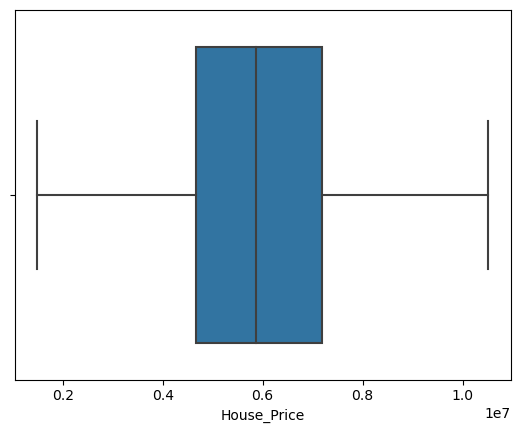

In [14]:
#Code here
import seaborn as sns
sns.boxplot(x='House_Price', data=df2)

**EXPECTED OUTPUT:**

Batas bawah & batas atas:

871625.0 10976625.0

Visualisasi boxplot:

![boxplot2](https://drive.google.com/uc?id=1qZc-lEa5FUzSQ_cyt4_GJQ0TZ8c6WjHX)



